In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = 18,6

In [7]:
covid = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv',
    skiprows=range(1,41),
)

In [8]:
def preprocess(covid):
    covid = covid[:206]
    print(covid.shape)
    covid = covid.drop(columns=[
        'WHO region',
        'Province/States'
    ]).groupby('Country/Region').sum().transpose()
    covid.index = pd.to_datetime(covid.index)
    covid.index.name = 'Date'
    covid.columns.name = 'Country'
    return covid

In [34]:
def window_plot(data, country, num_peaks=1, ax=None):
    start_date = data.index[0].date()
    end_date = data.index[-1].date()
    ax = data[country].plot(ax=ax);
    for peak in all_peaks[country][-num_peaks:]:
        ax.axvline(data.index[peak], color='orange')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Daily New Cases', fontsize=12)
    ax.set_title(f'Seven Day Rolling Sum of Total Cases \nin {country} from {start_date} to {end_date}', fontsize=12);
    plt.show()

In [42]:
def plot_all(data, num_peaks, case_threshold):
    for country in data.columns:
        if data[country].max() > case_threshold:
            window_plot(data, country, num_peaks)

In [11]:
covid = preprocess(covid)

(206, 77)


In [45]:
covid

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United Republic of Tanzania,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,occupied Palestinian territory
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,114.0,223.0,454.0,341.0,2.0,2.0,7.0,745.0,482.0,46.0,...,14.0,22.0,122653.0,303.0,145.0,113.0,188.0,16.0,5.0,115.0
2020-03-31,166.0,223.0,511.0,370.0,2.0,2.0,7.0,820.0,482.0,50.0,...,19.0,30.0,140640.0,309.0,149.0,129.0,203.0,35.0,5.0,117.0
2020-04-01,192.0,243.0,584.0,376.0,7.0,2.0,7.0,966.0,532.0,55.0,...,19.0,30.0,163199.0,320.0,173.0,129.0,207.0,35.0,8.0,134.0


In [37]:
grouped = covid.diff().groupby(pd.Grouper(level='Date', freq='1w', loffset='2d')).sum()

In [44]:
grouped

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United Republic of Tanzania,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,occupied Palestinian territory
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08,3.0,0.0,16.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,...,0.0,0.0,151.0,0.0,0.0,0.0,5.0,0.0,0.0,16.0
2020-03-15,6.0,38.0,20.0,1.0,0.0,0.0,1.0,36.0,7.0,0.0,...,0.0,0.0,1465.0,0.0,0.0,2.0,32.0,0.0,0.0,22.0
2020-03-22,14.0,38.0,57.0,86.0,2.0,0.0,0.0,113.0,152.0,5.0,...,6.0,6.0,13541.0,94.0,33.0,34.0,41.0,2.0,2.0,14.0


In [38]:
all_peaks = grouped.apply(find_peaks).apply(lambda x: x[0])

In [39]:
all_peaks.Brazil

array([], dtype=int64)

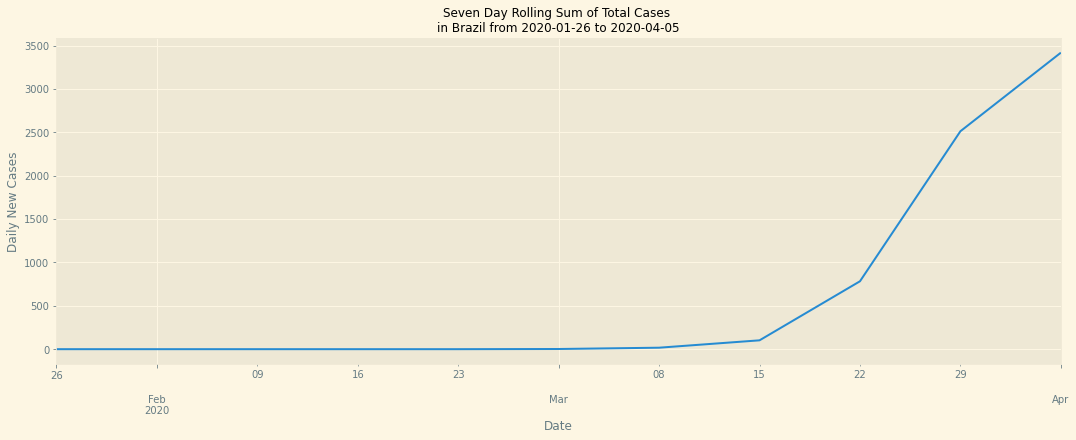

In [40]:
window_plot(grouped, 'Brazil', 4)

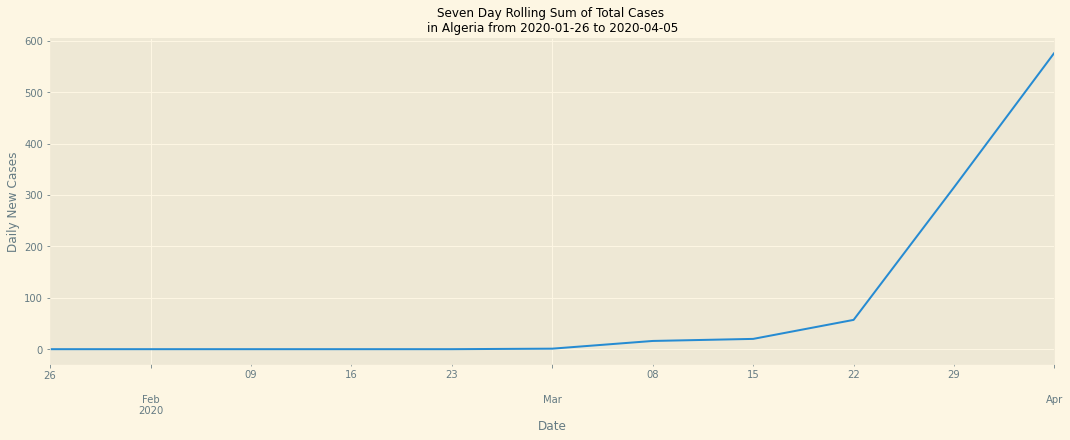

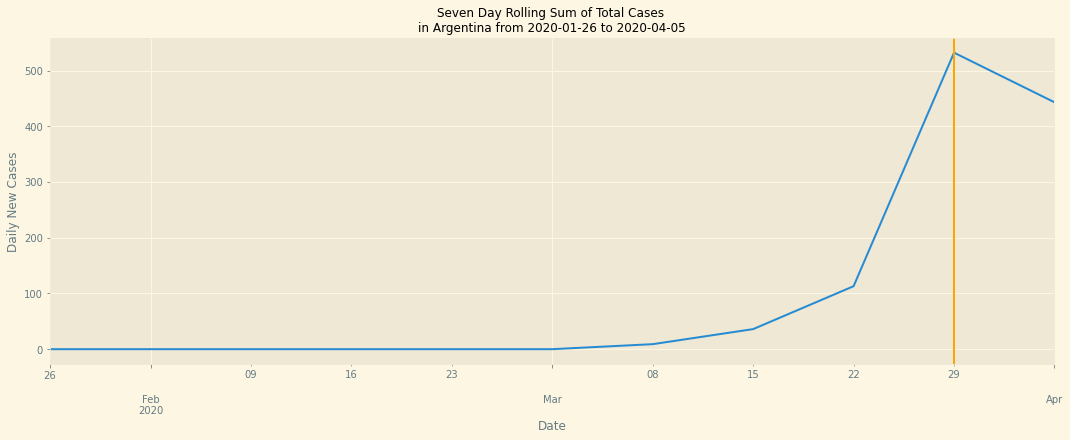

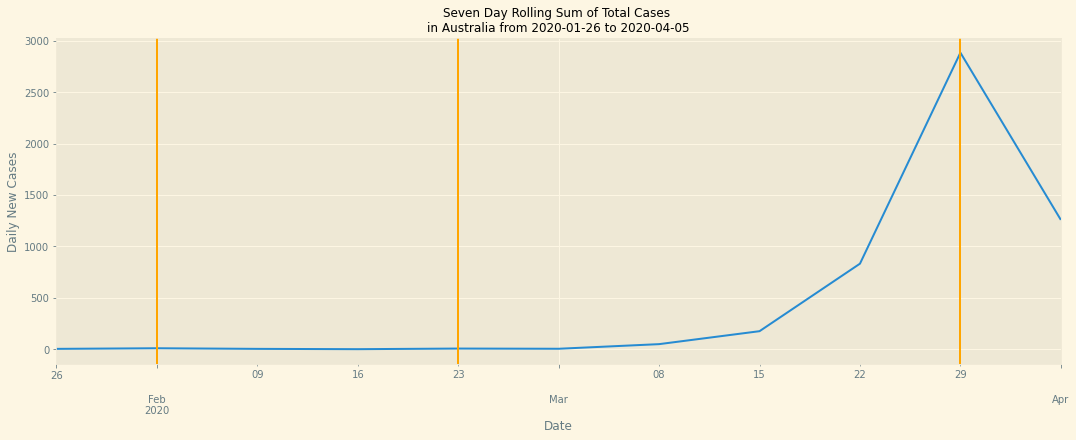

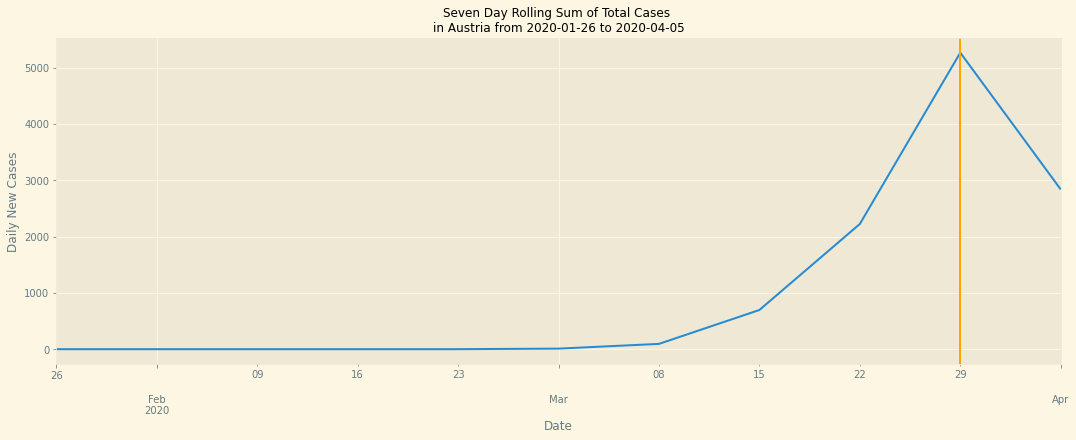

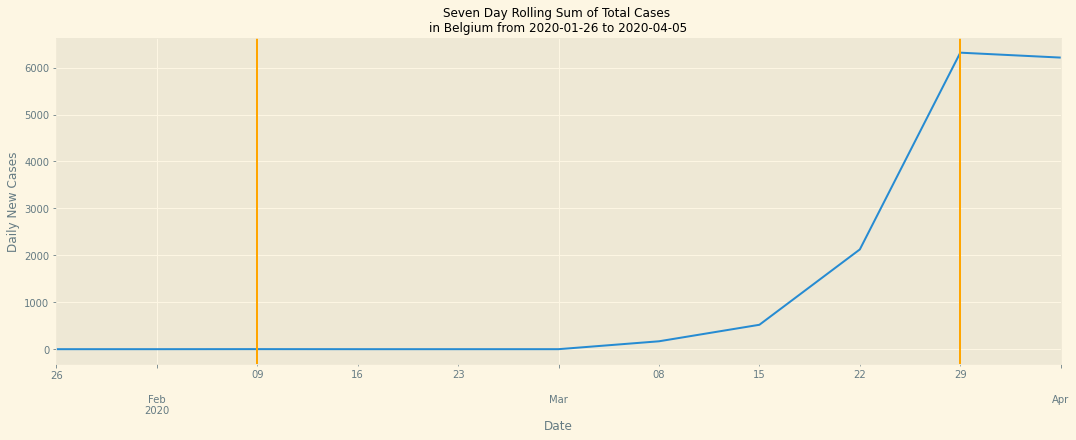

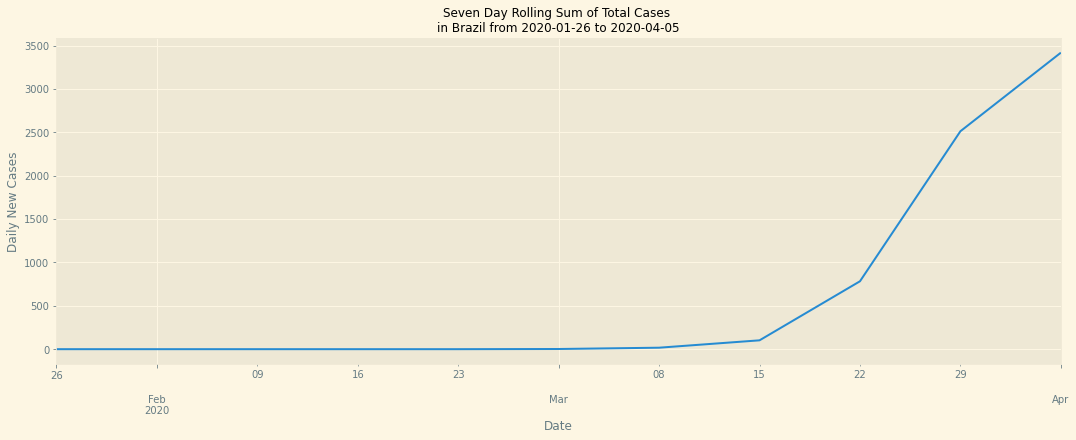

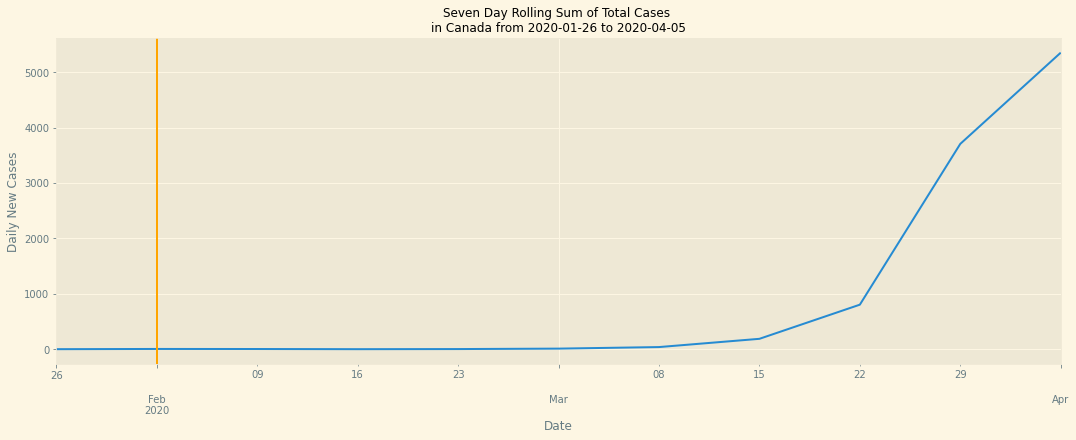

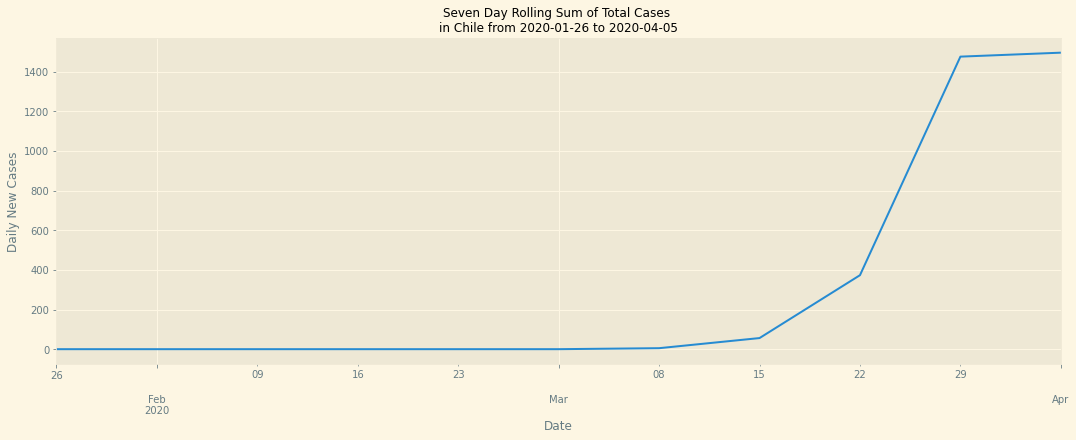

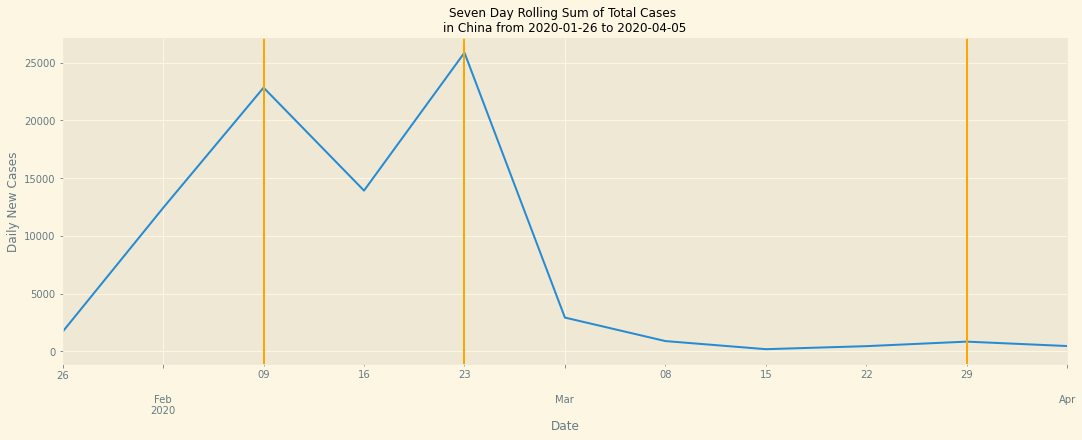

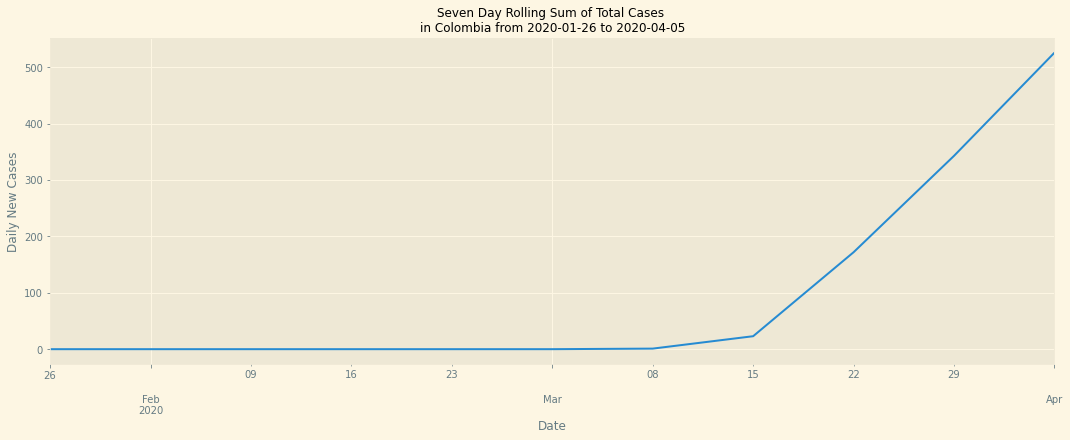

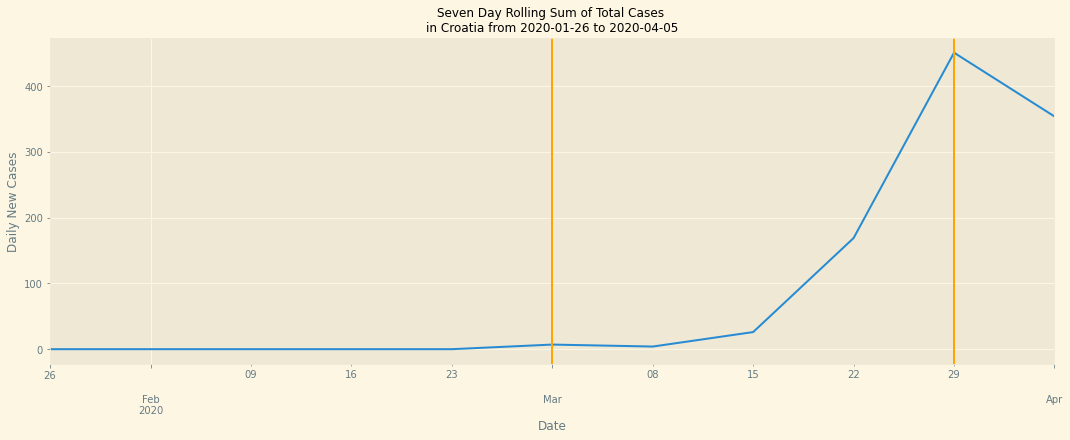

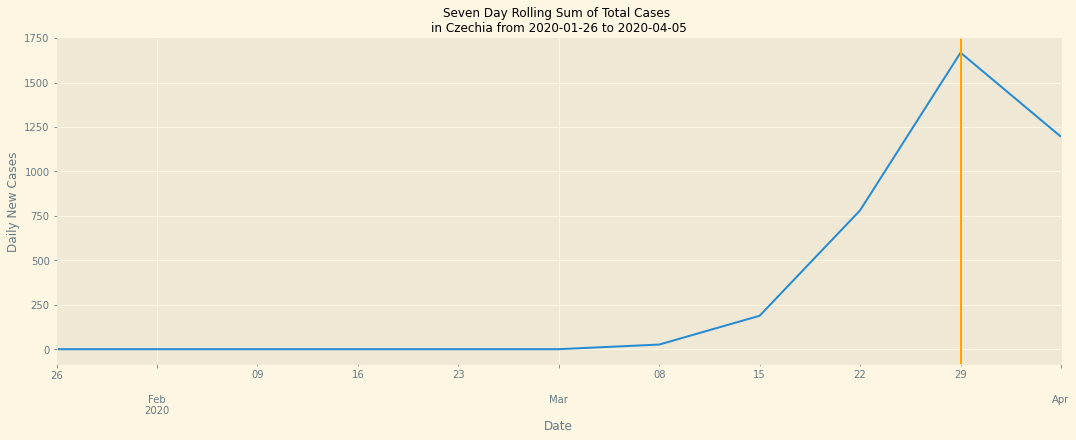

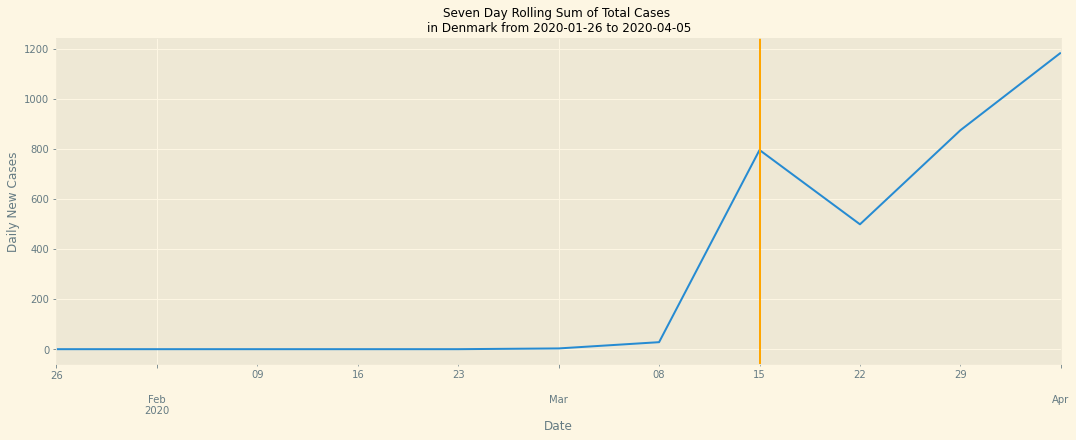

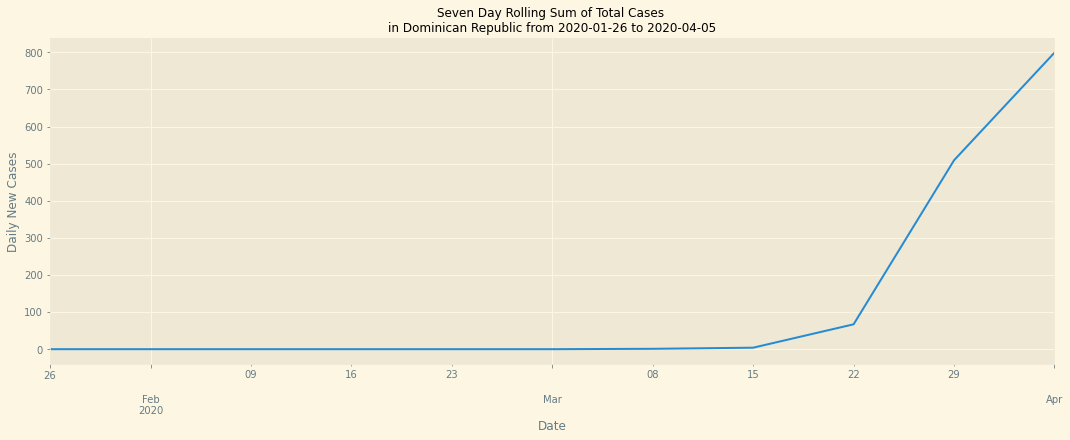

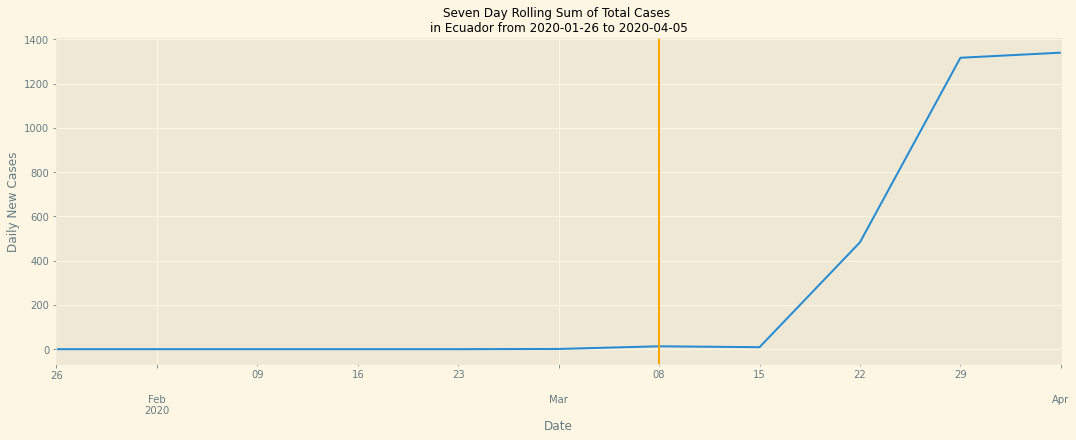

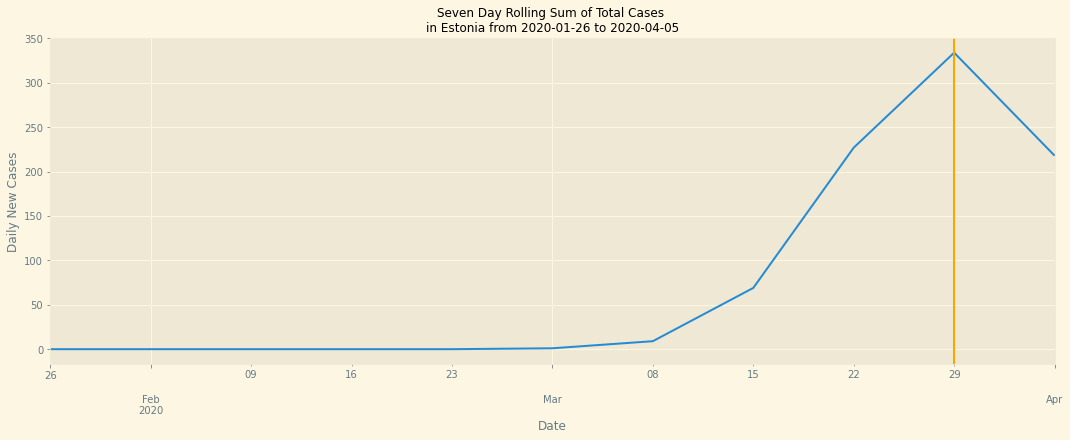

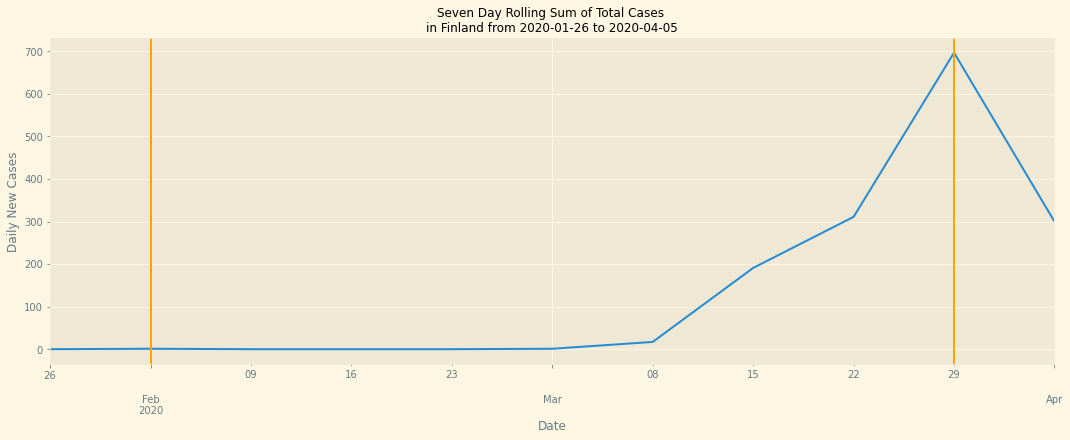

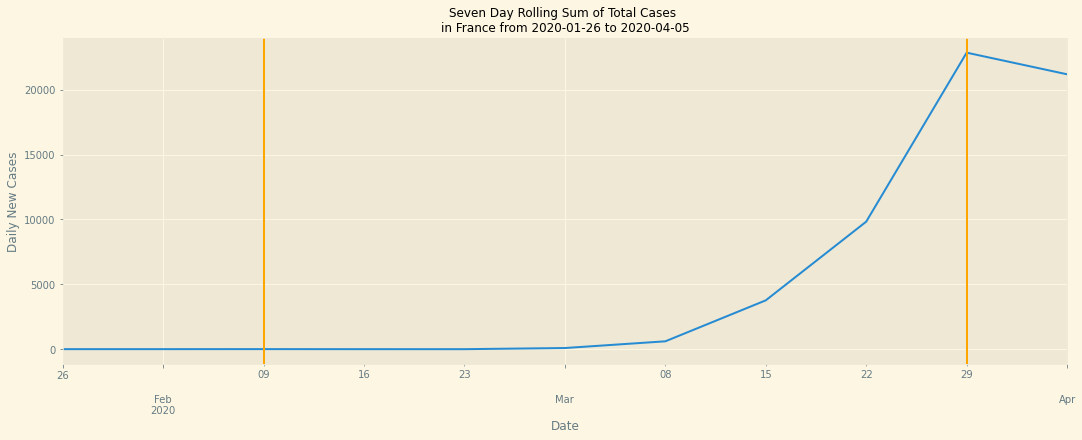

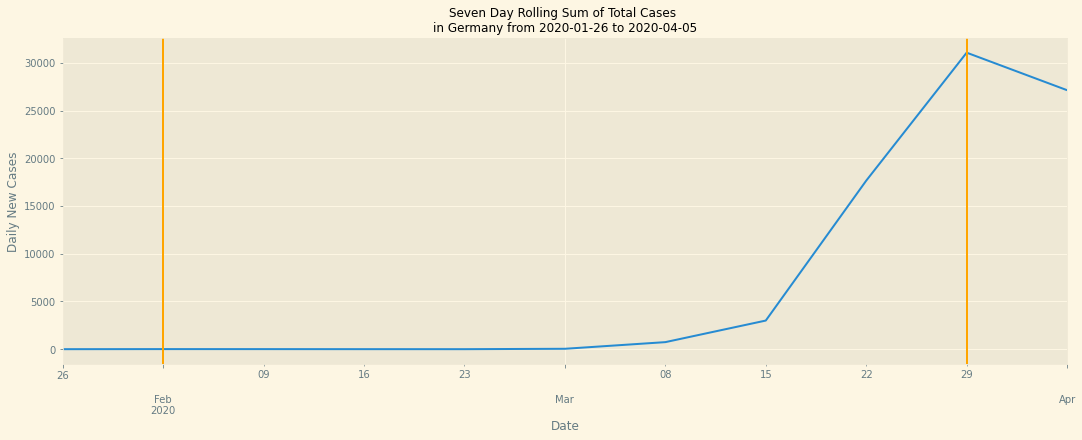

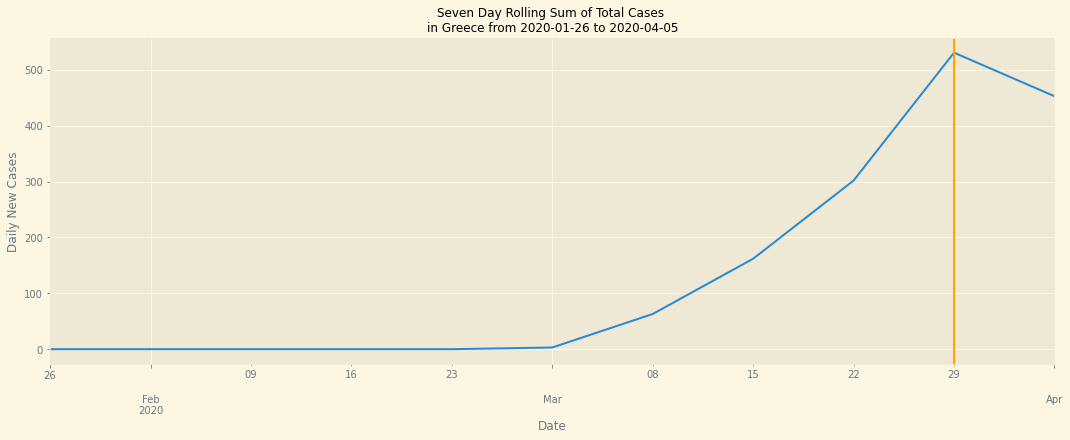

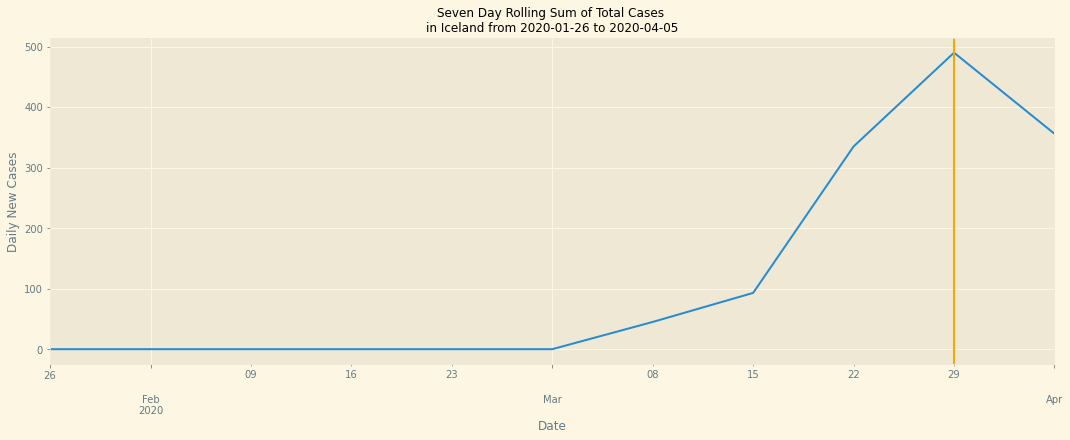

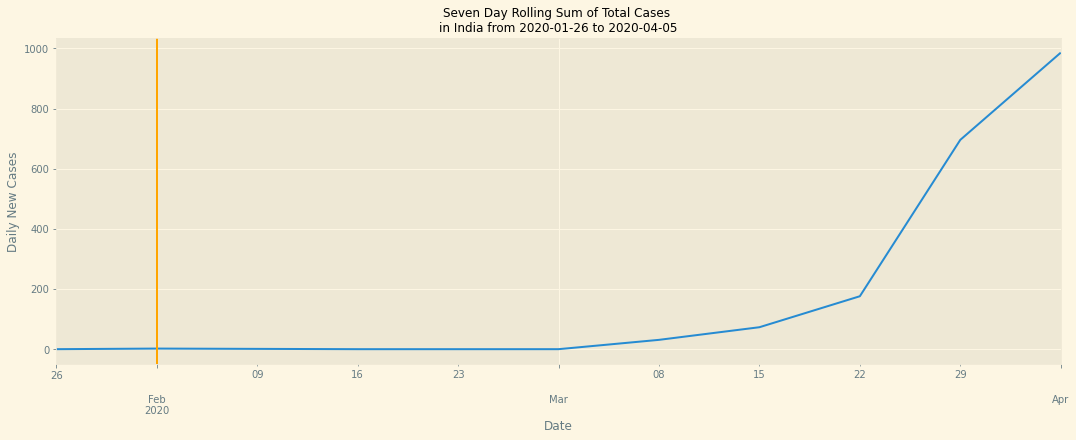

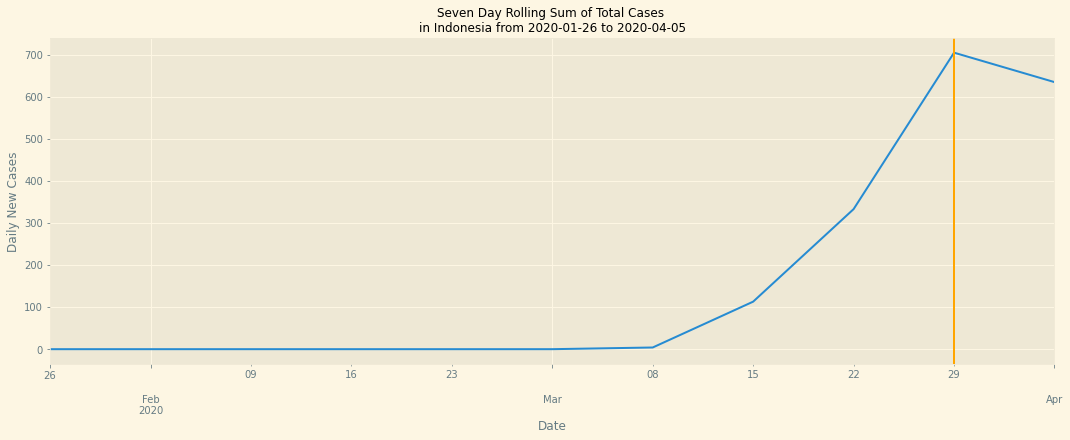

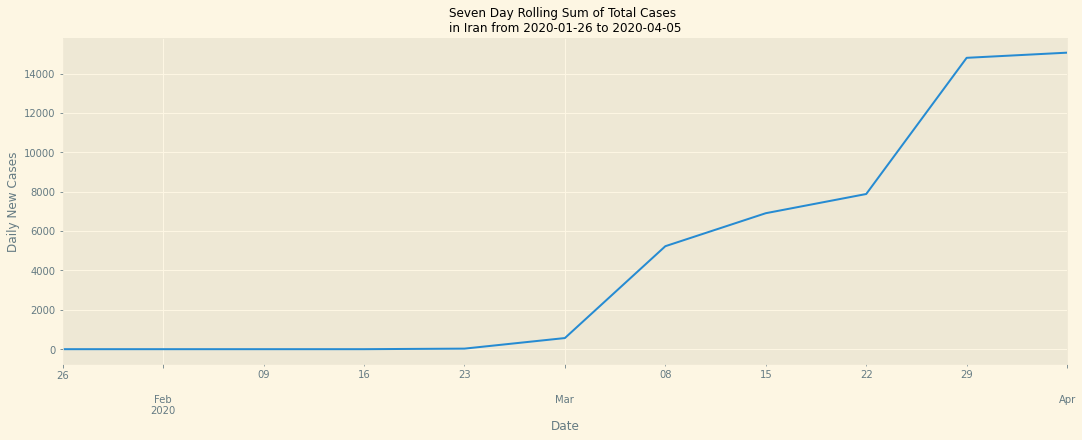

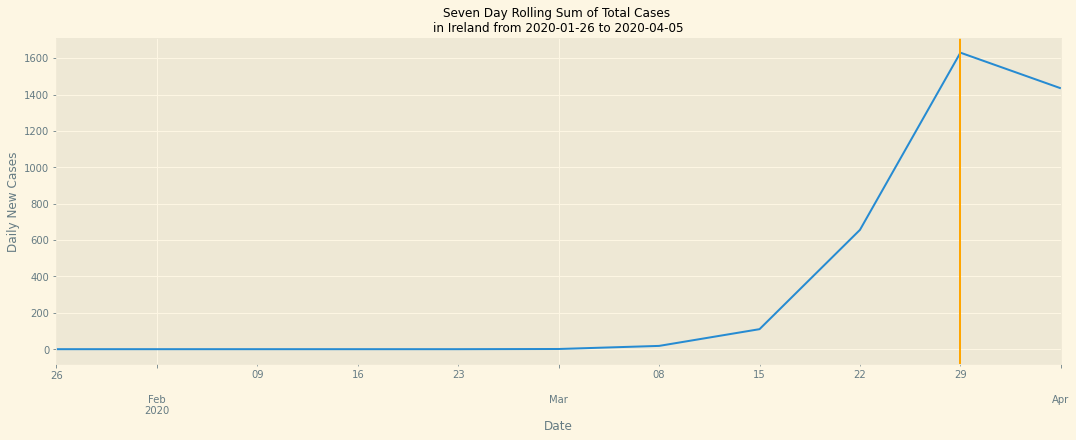

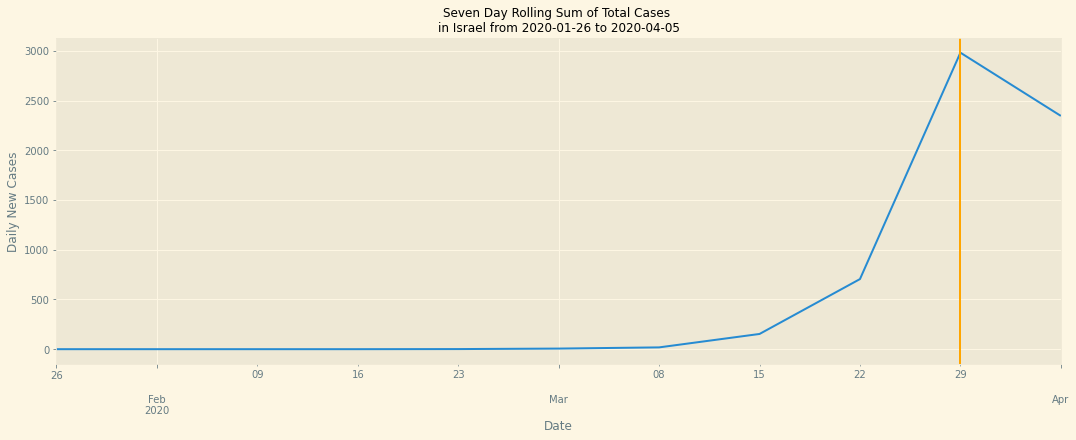

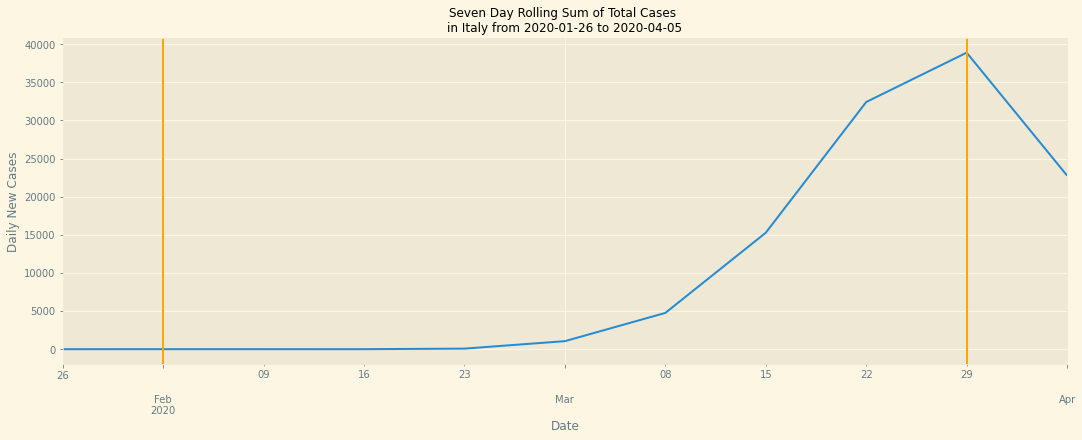

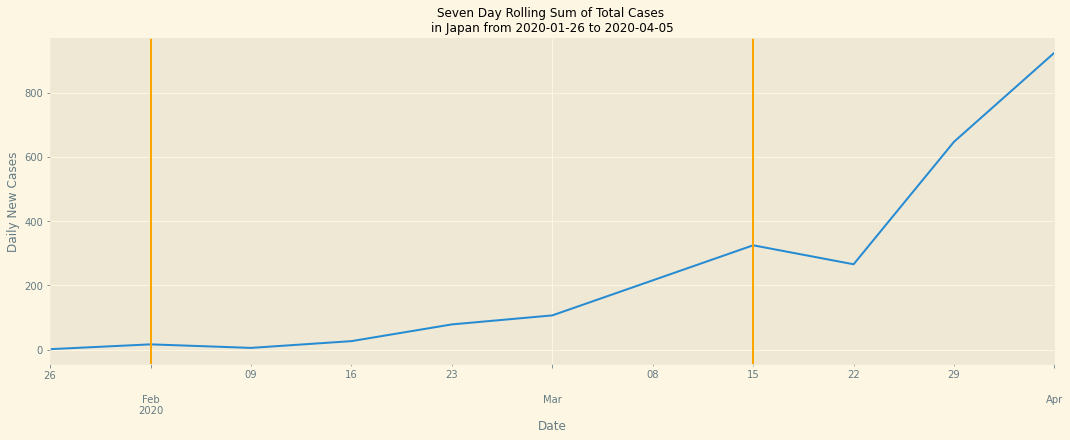

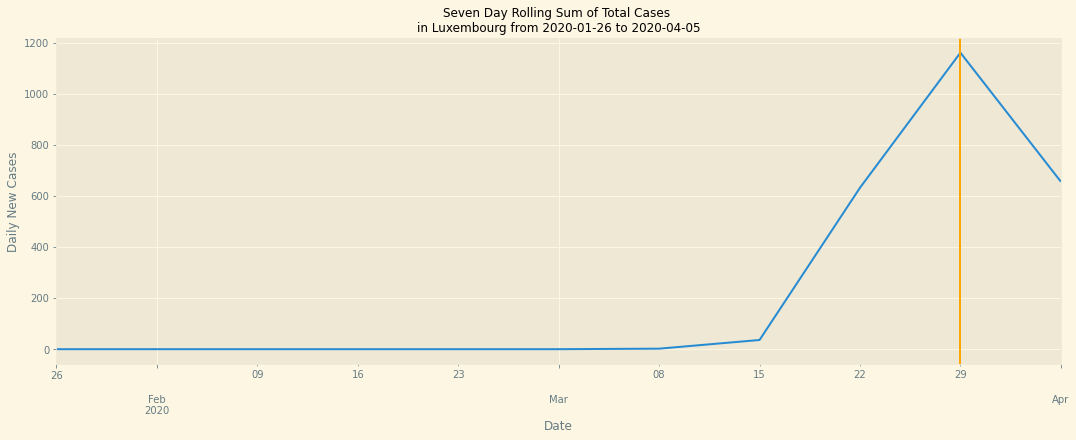

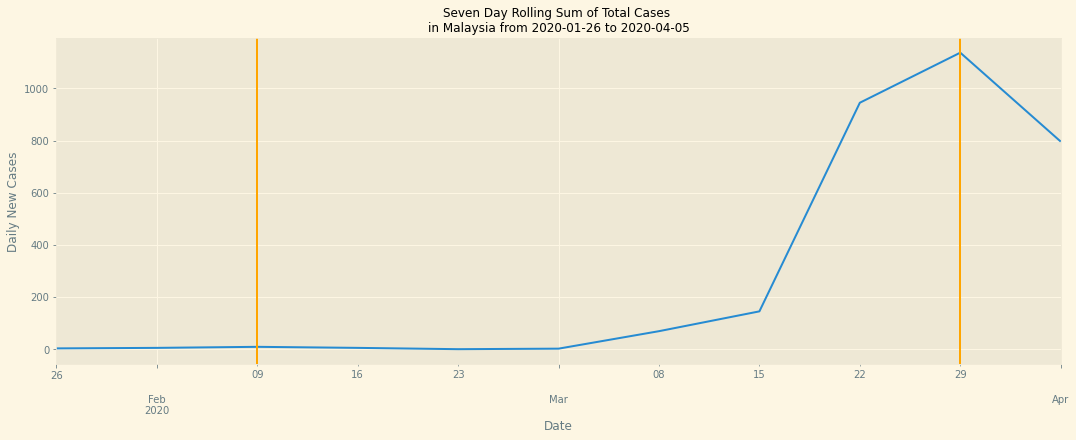

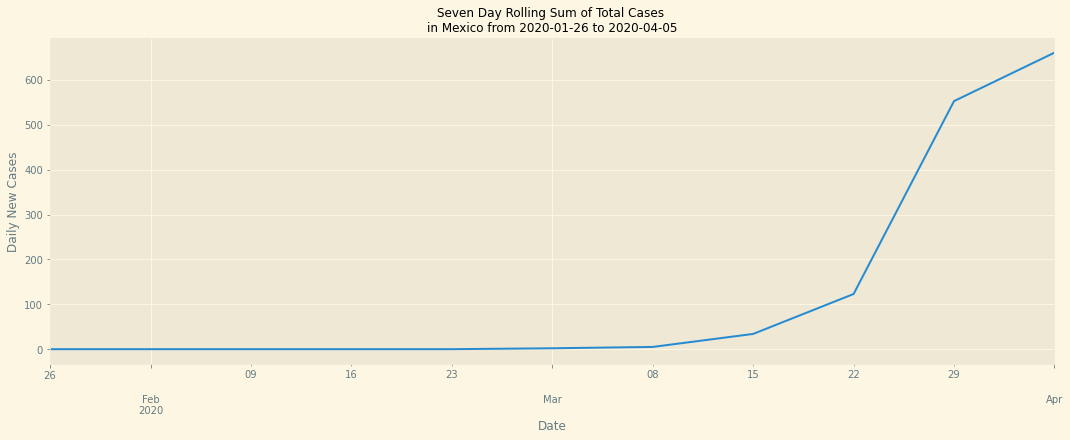

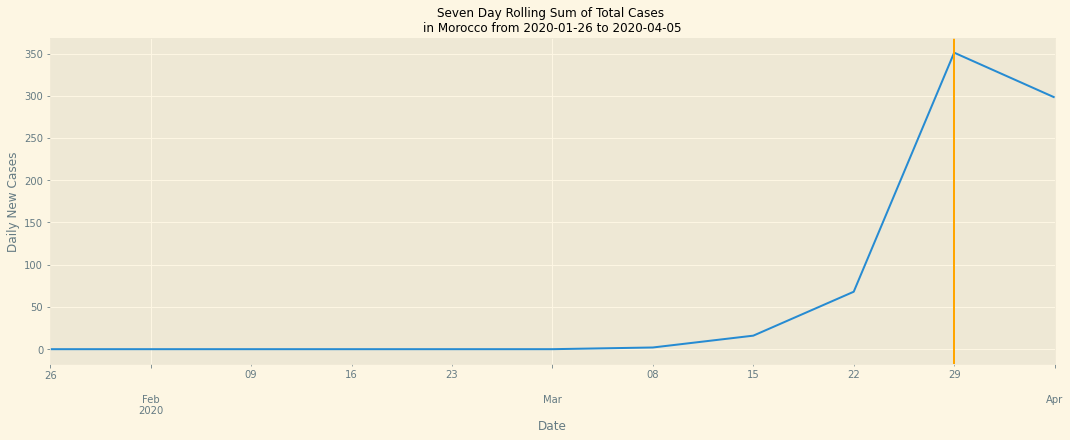

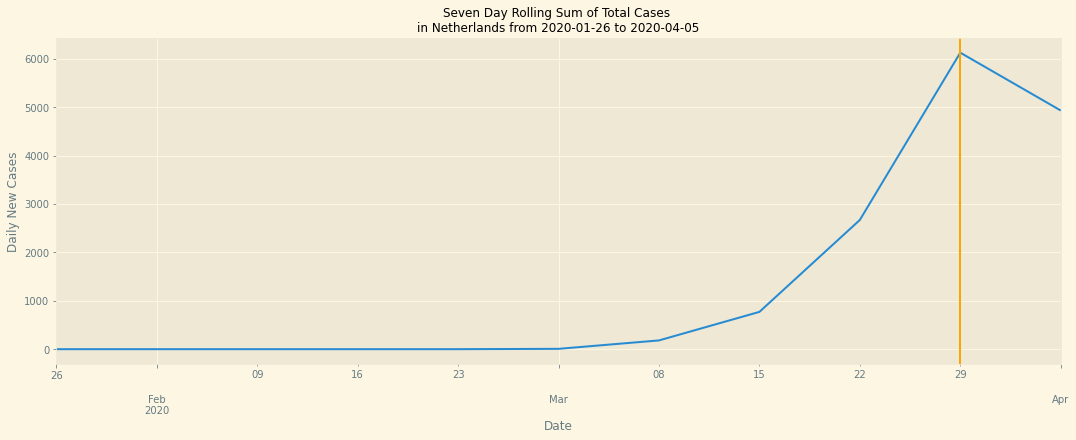

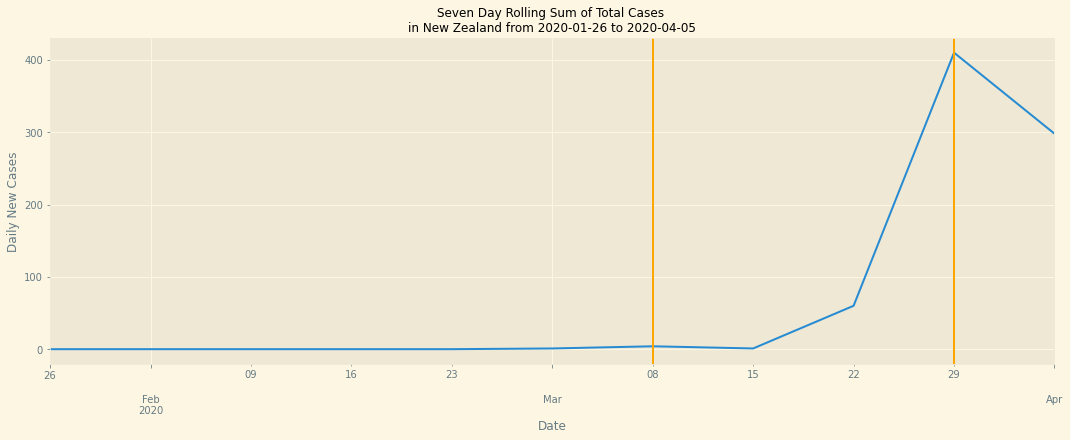

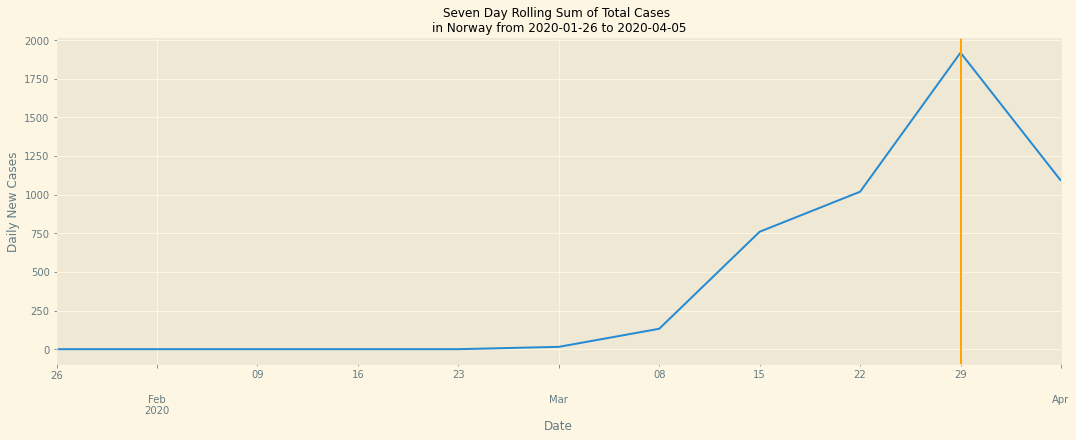

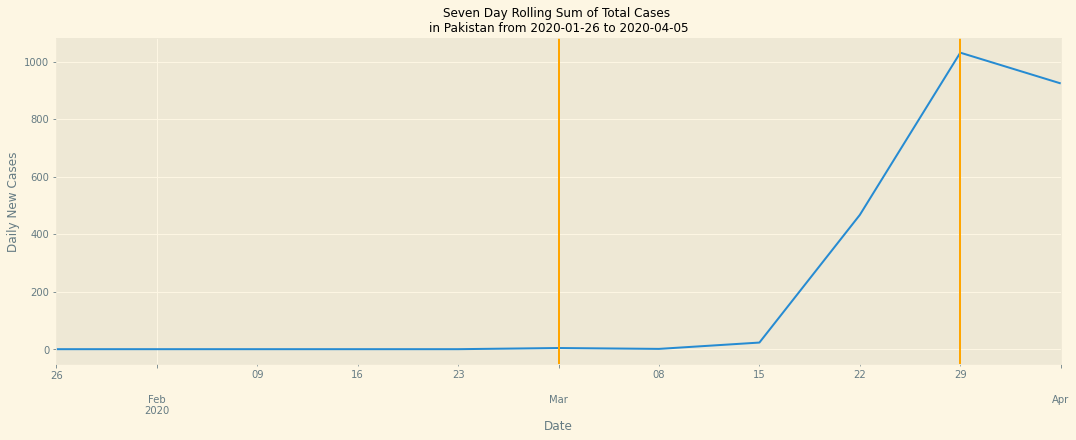

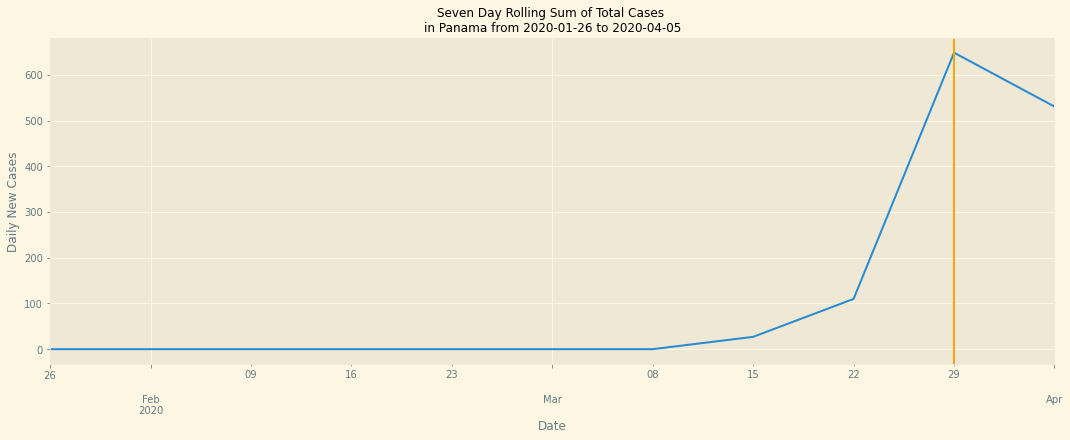

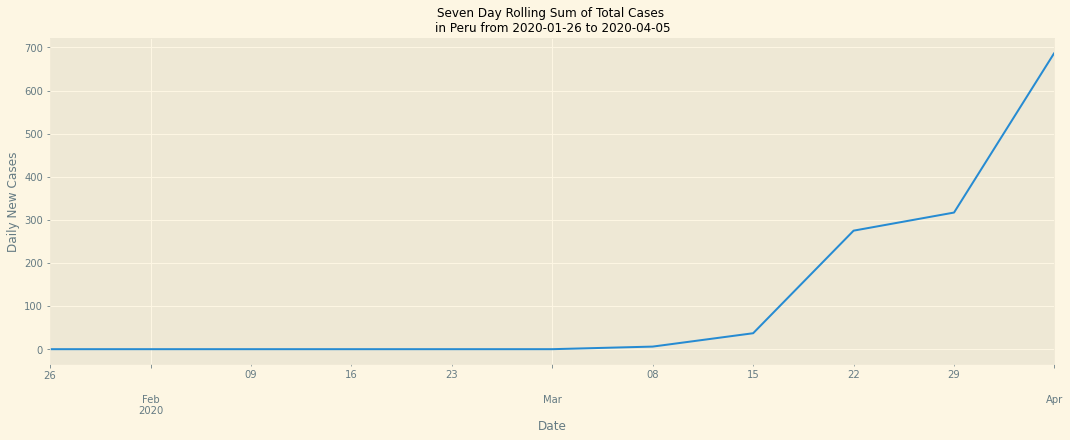

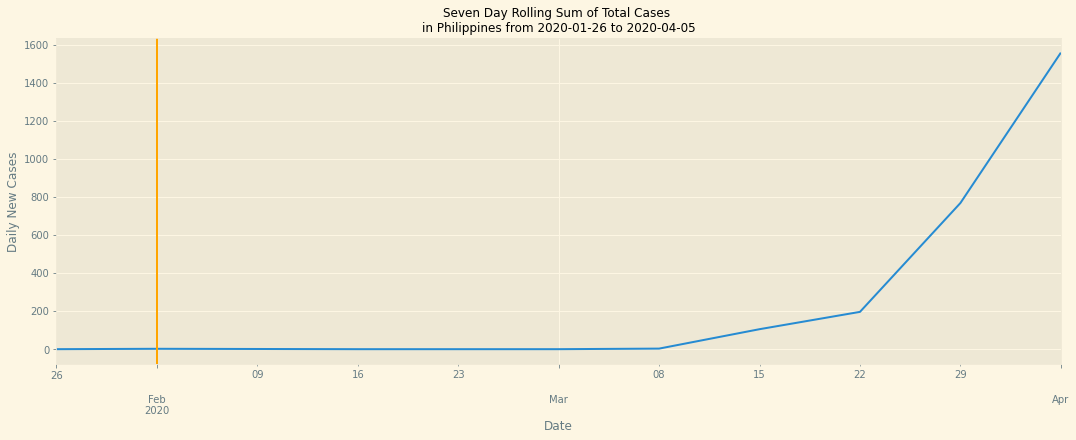

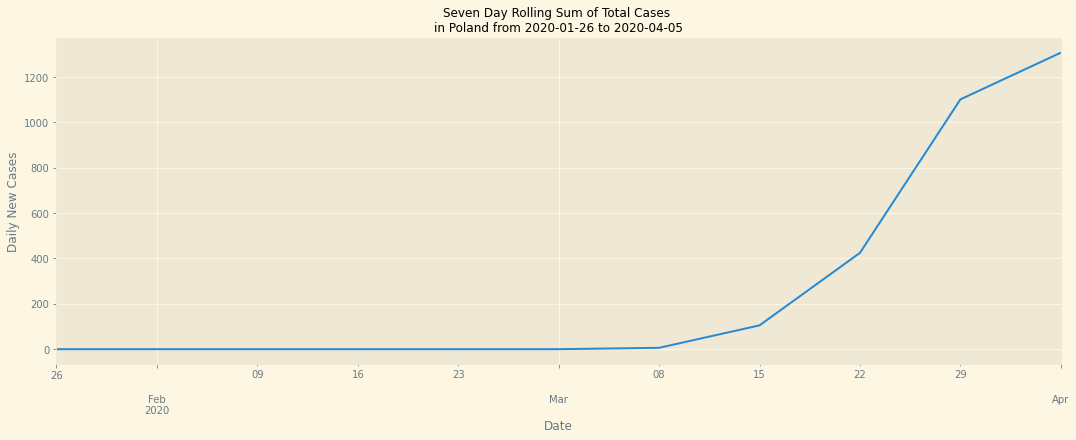

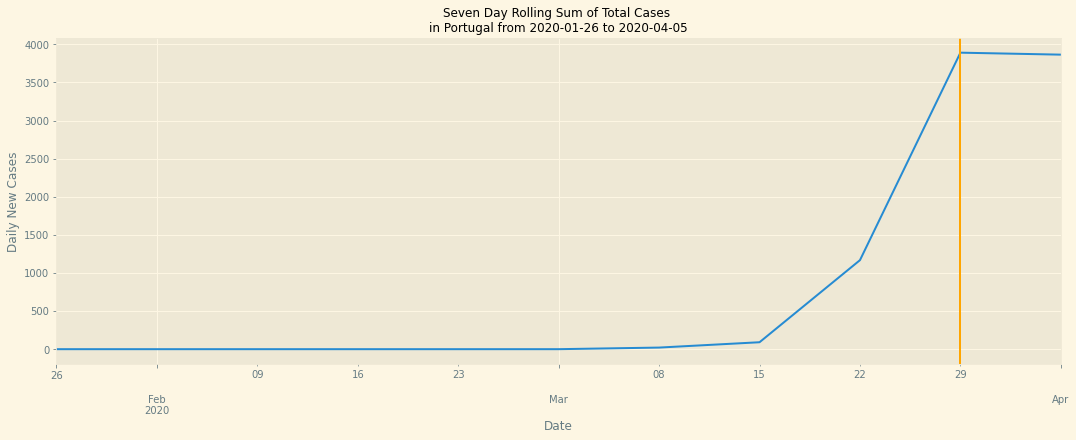

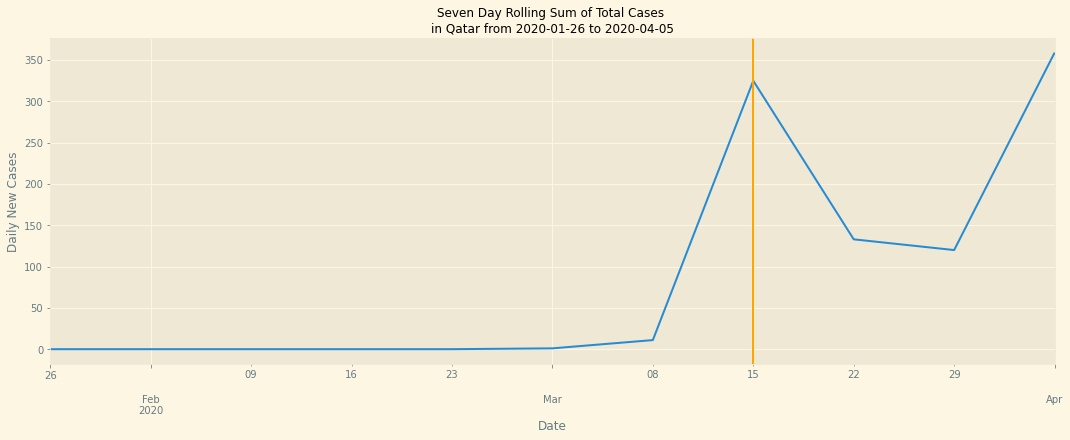

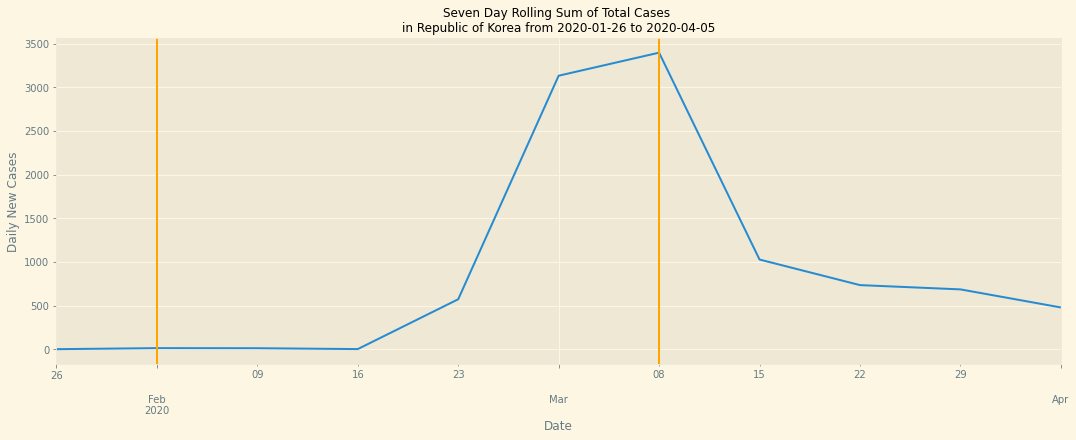

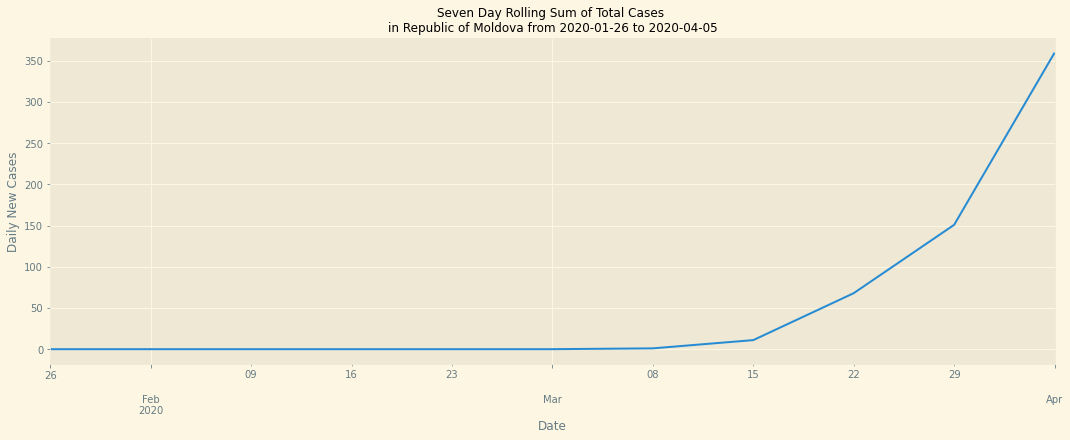

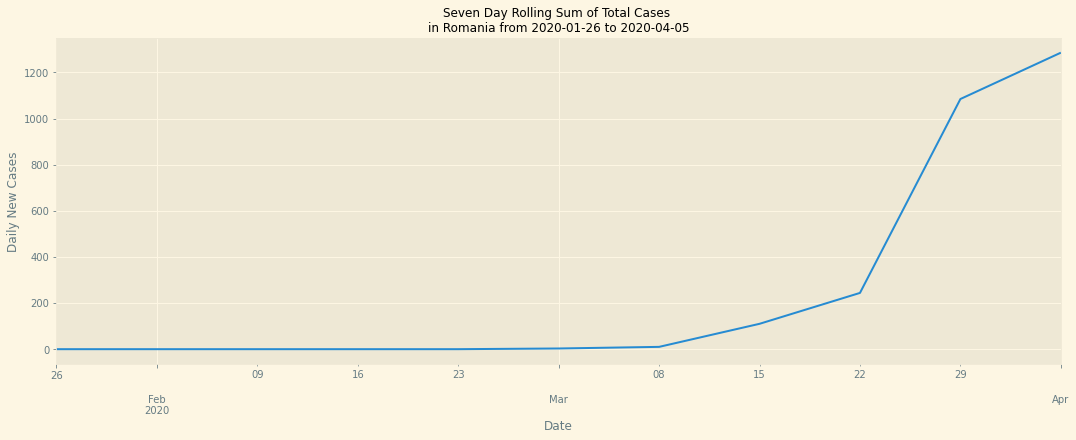

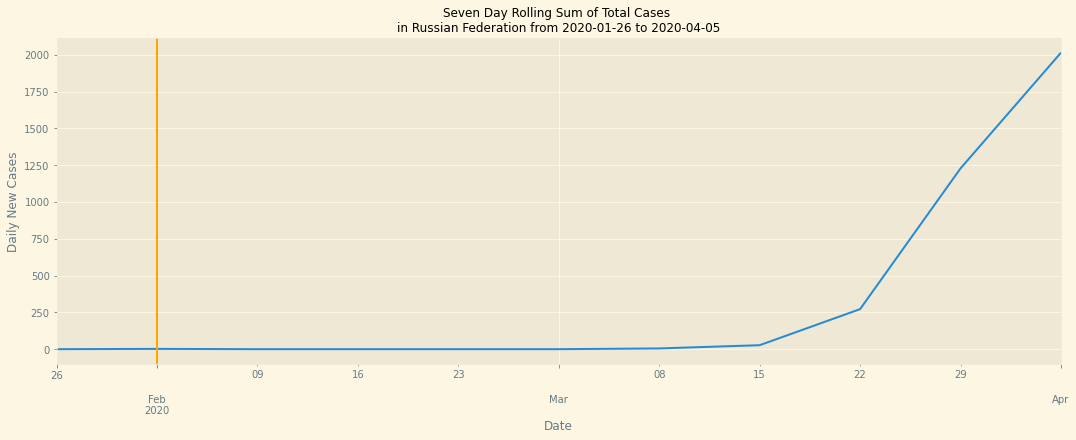

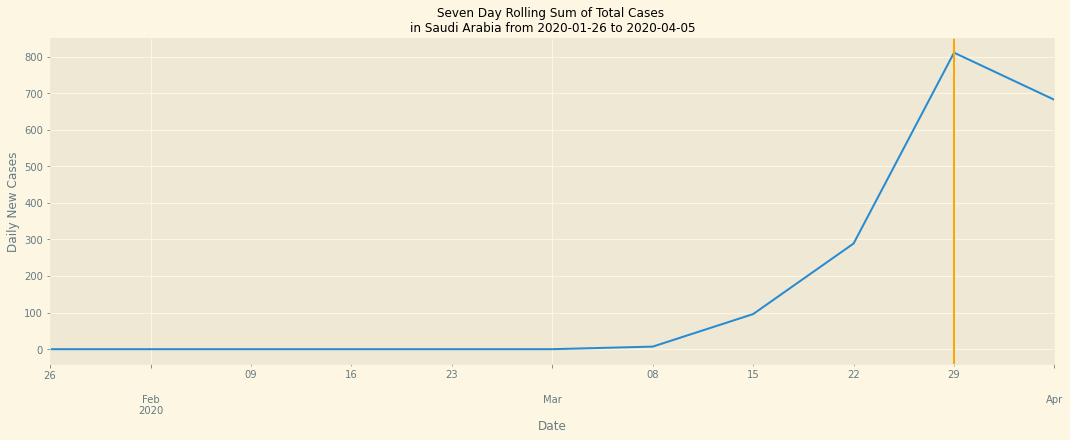

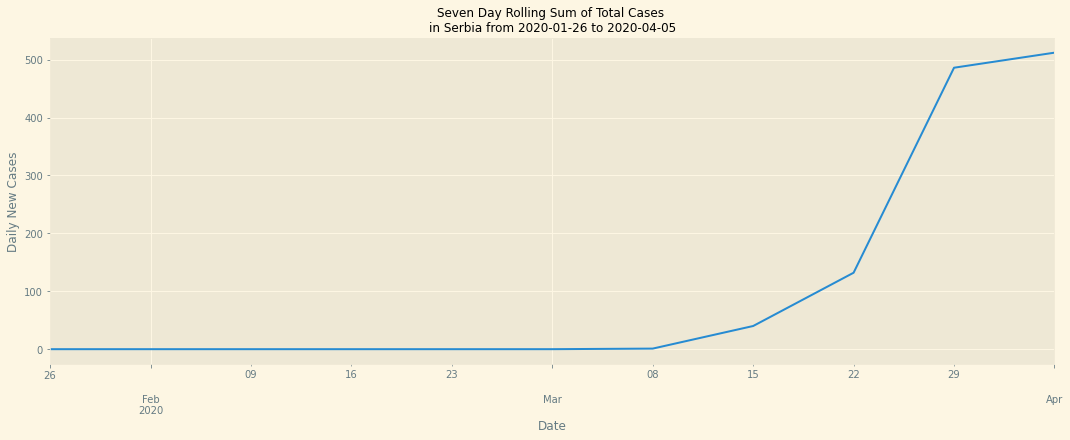

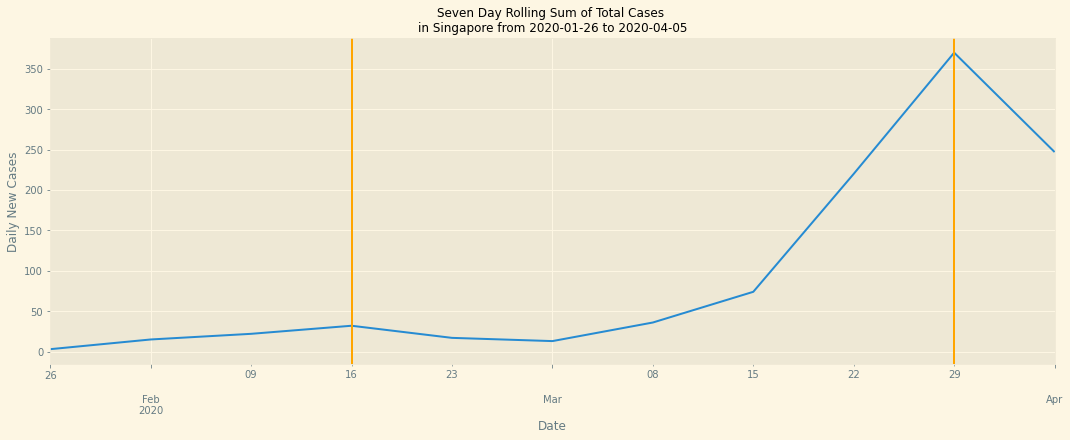

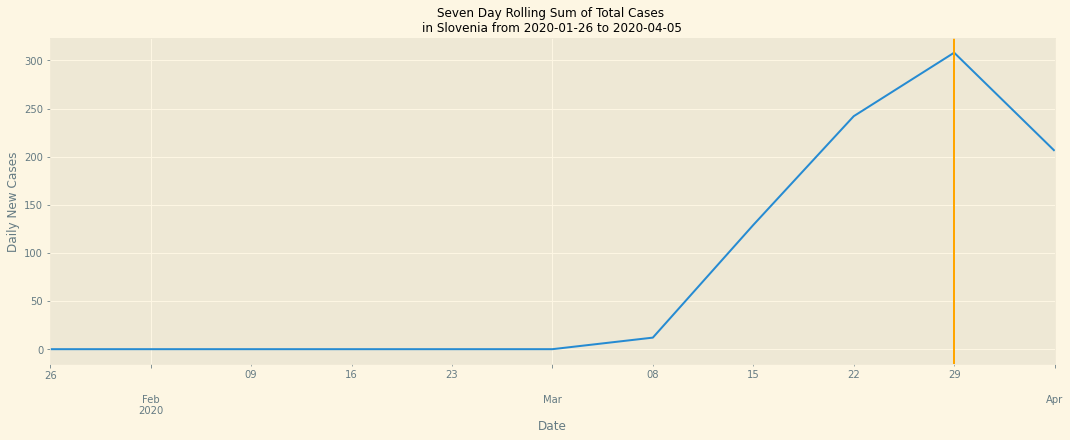

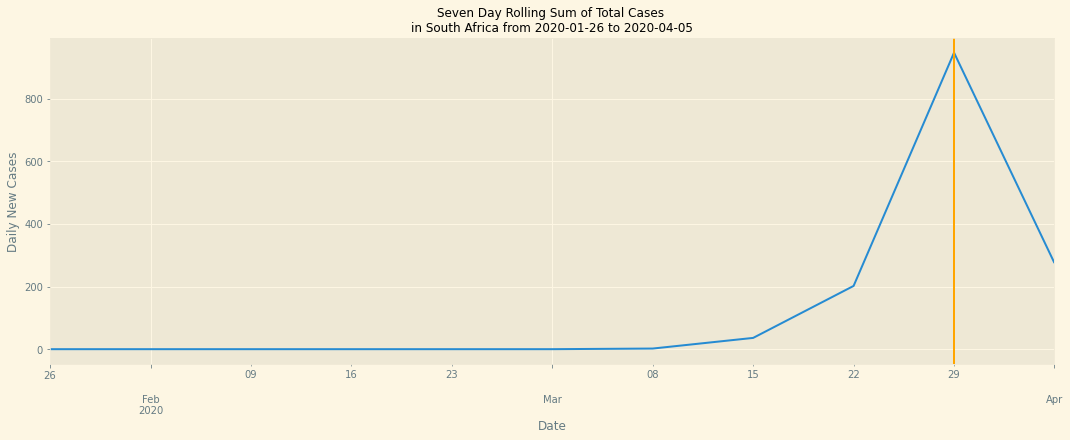

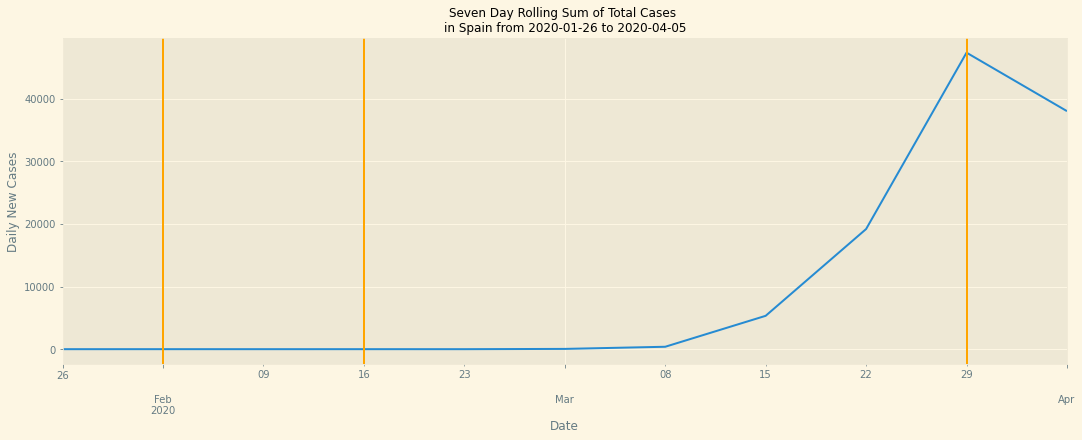

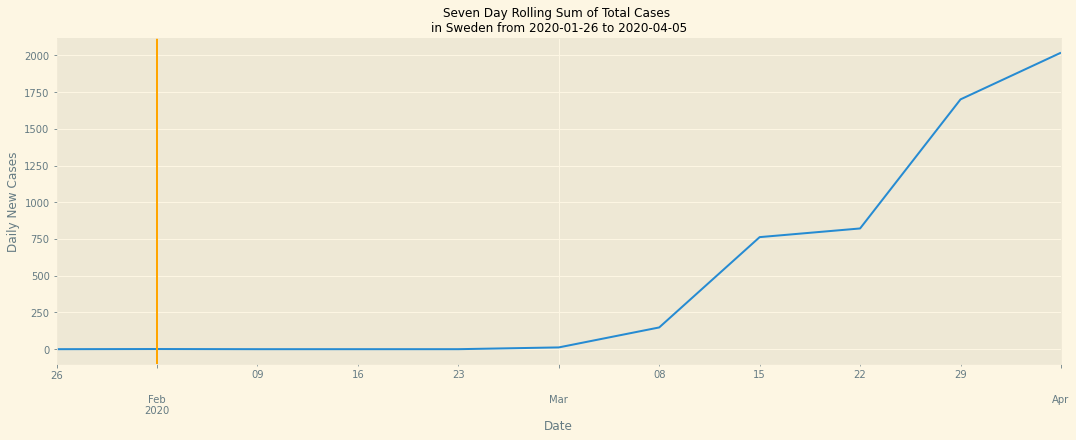

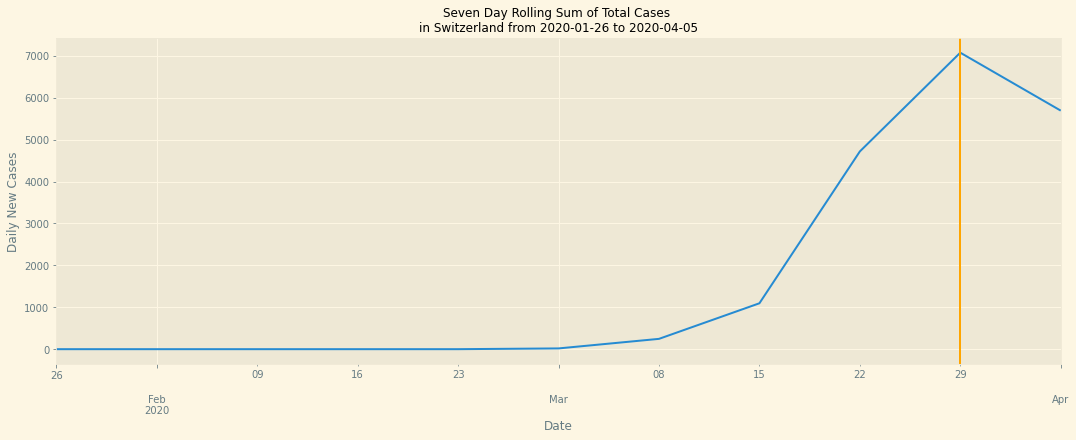

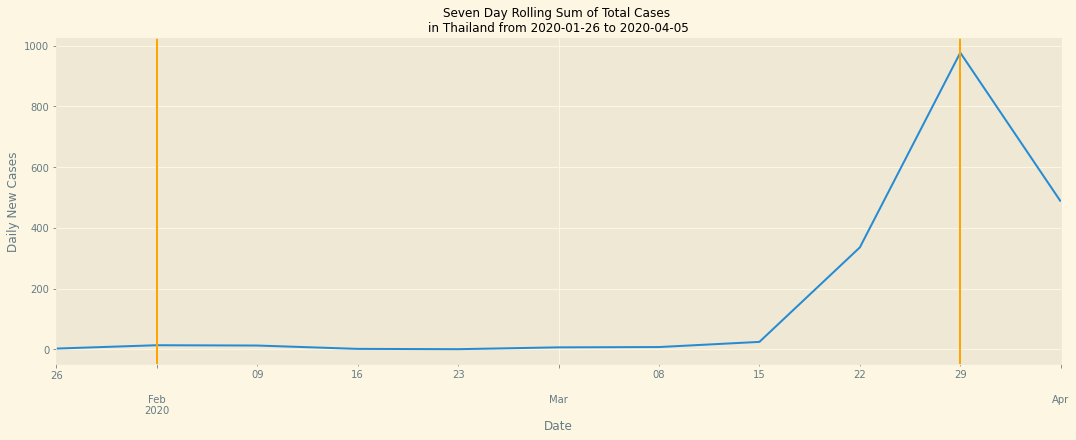

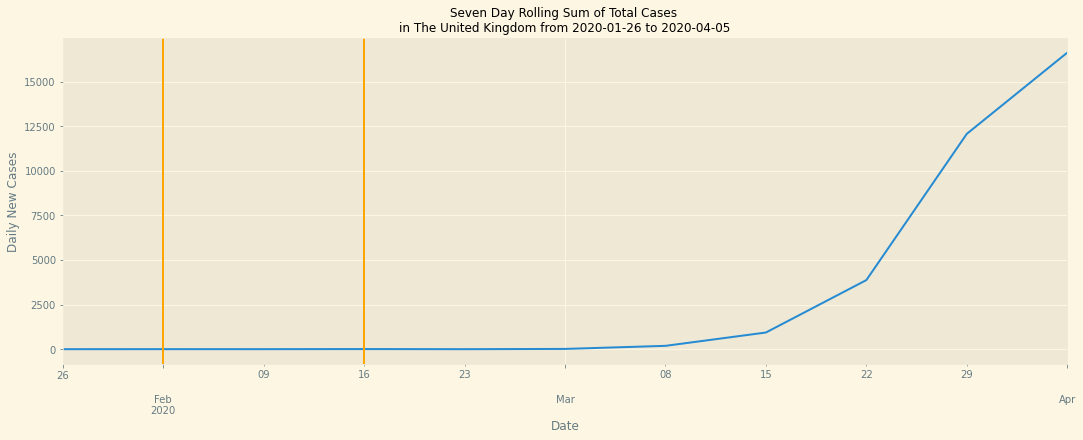

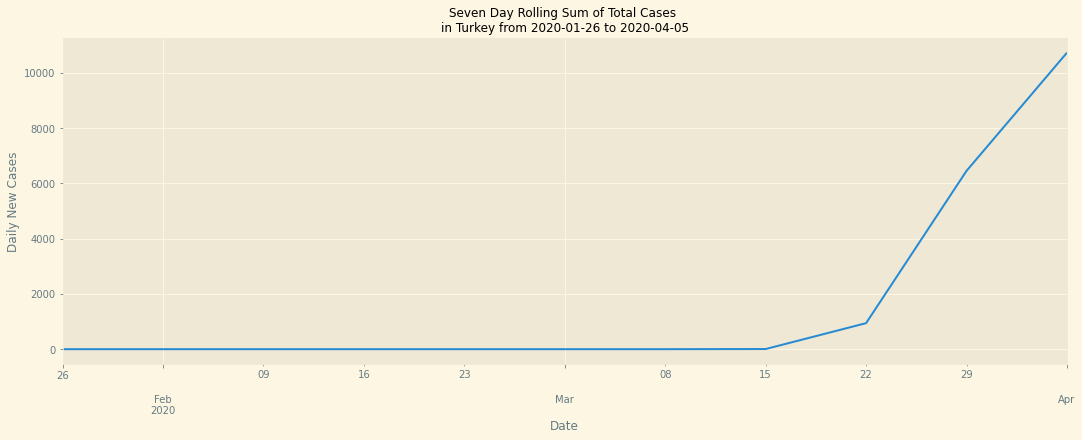

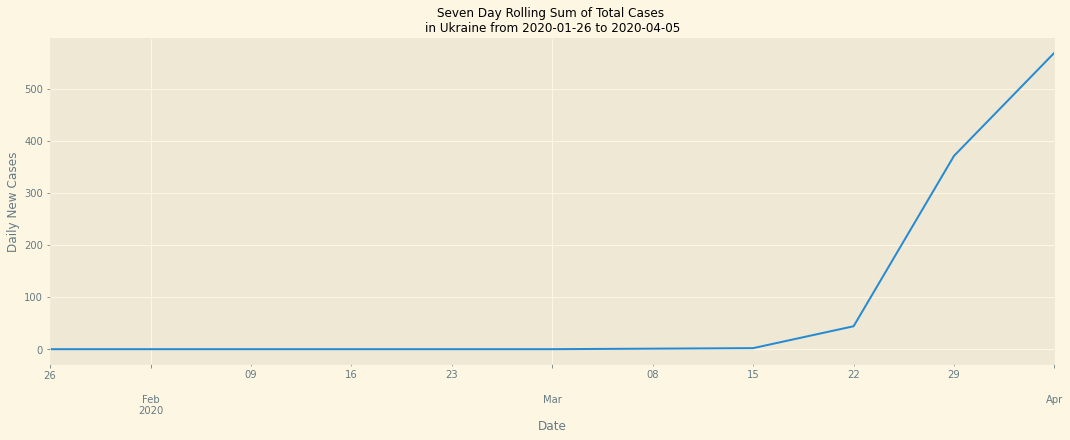

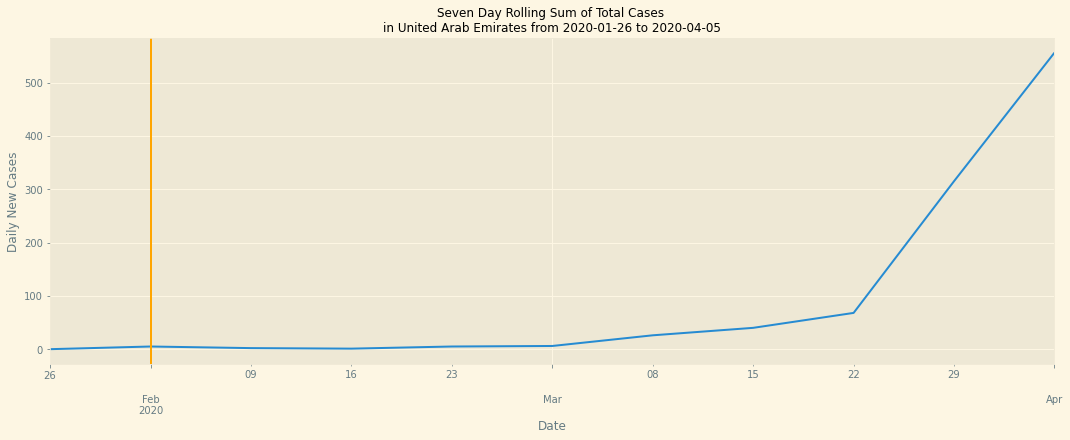

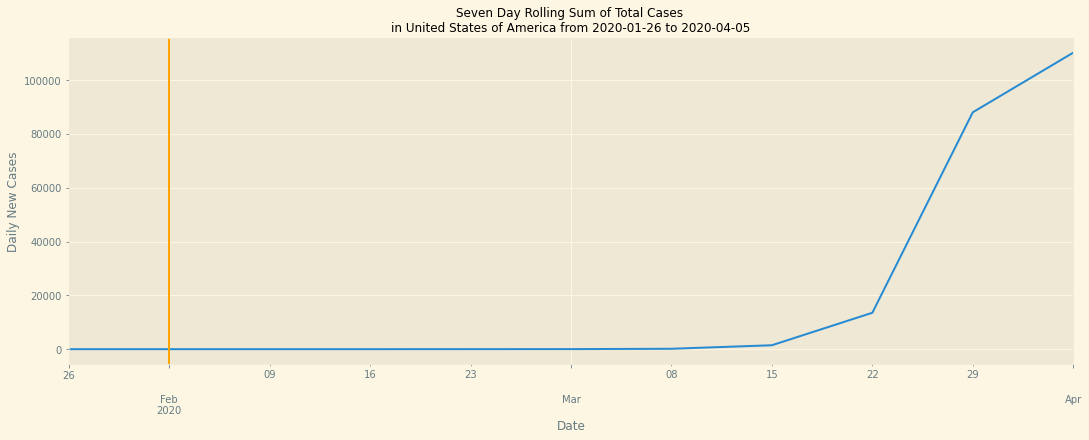

In [43]:
NUM_PEAKS = 4
CASES_THRESHOLD = 300
plot_all(grouped, NUM_PEAKS, CASES_THRESHOLD)

In [12]:
def new_cases():
    """WHO New Cases in Brazil manually copied from sitreps"""
    total_cases = {
        '2020-04-11':17857,
        '2020-04-10':15927,
        '2020-04-9' :13717,
        '2020-04-8' :12056,
        '2020-04-7' :11130,
        '2020-04-6' :10278,
        '2020-04-5' :9056,
        '2020-04-4' :7910,
        '2020-04-3' :6836,
        '2020-04-2' :5717,
    }
    s = pd.Series(total_cases)
    s.index = pd.to_datetime(s.index)
    s = s.sort_index()
    s.name = 'Brazil'
    return s

In [13]:
s = new_cases()
s

2020-04-02     5717
2020-04-03     6836
2020-04-04     7910
2020-04-05     9056
2020-04-06    10278
2020-04-07    11130
2020-04-08    12056
2020-04-09    13717
2020-04-10    15927
2020-04-11    17857
Name: Brazil, dtype: int64